No of images:62
Sum of images:588.12
Max size:78.64
Min size :0.068
Average : 9.8
SD : 12
2 url's have some problem
0.5289410179842837


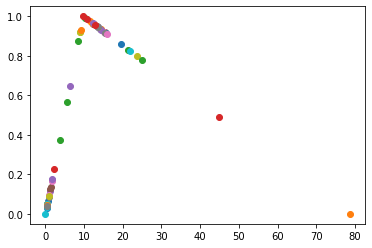

In [3]:
import re,urllib,requests,math
# from io import StringIO
from bs4 import BeautifulSoup
import math,statistics
import matplotlib.pyplot as plt
import numpy as np
# import scipy.stats
from scipy import stats
from scipy.stats import norm
url = "https://en.wikipedia.org/wiki/Rabindranath_Tagore"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
images = soup.find_all('img')
# print(images['src'])
# print(type(images))
t = 0    
count = 0
Max = 0
Min = float("inf")
list1 = list()
Sum = 0
for img in soup.find_all("img"):
    try:
        img_url = img.attrs.get("src")
        s = "https:"+img_url
    #     print(s)
        file = urllib.request.urlopen(s)
        size = file.headers.get("content-length")
    #     print(int(size)/1000)
        length = int(size)/1000
    #     print(length)
        Max = max(Max,length)
        Min = min(Min,length)
        count+=1
        Sum+=length
        list1.append(length)
        if not img_url:
            continue
    except:
        t+=1
        count+=1
    #         # if img does not contain src attribute, just skip
    #         continue
    # print(count)
mean = round(Sum/(count-t),2)
print(f"No of images:{count}\nSum of images:{round(Sum,2)}KB\nMax size:{Max}KB\nMin size :{Min}KB\nAverage : {mean}KB")
c1 =min(100,mean)
c = 0
sd = 0
y = 0
for i in list1:
    sd = sd+(i-mean)**2
    if(i>c1):
        x = (Max-i)/(Max-c1)
        y+=x
    elif(i<c1):
        x = (i-Min)/(c1-Min)
        y+=x
    else:
        x = 1
        y+=x
    c+=1
    plt.plot(i,x,'o')
sd1 = round(math.sqrt(sd/(count-t)))
print(f"SD : {sd1}")
print(f"{t} url's have some problem")
# print(statistics.stdev(list1))
# plt.show()
print(y/c)

In [35]:
# import re,urllib,requests,math
# file = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Rabindranath_Tagore_unknown_location.jpg/220px-Rabindranath_Tagore_unknown_location.jpg")
# size = file.headers.get("content-length")
# # print(round(size/1000))
# print(round(int(size)/1000))

14


1
